In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def TransformRowDiff(d):
    a = np.lib.stride_tricks.as_strided(
        d,
        (d.shape[0], d.shape[0], d.shape[1]),
        (d.itemsize * d.shape[1], 0, d.itemsize),
    )
    a = a.reshape(-1, d.shape[1])
    b = np.lib.stride_tricks.as_strided(
        d,
        (d.shape[0], d.shape[0], d.shape[1]),
        (0, d.itemsize * d.shape[1], d.itemsize),
    )
    b = b.reshape(-1, d.shape[1])
    return a - b


In [3]:
path = "data/employee selection.csv"
data = pd.read_csv(path, header=None)
target_map = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
criteria_nr = 4
data[criteria_nr] = data[criteria_nr].apply(lambda x: target_map[x])
data = data.drop_duplicates()
data_input = data.iloc[:, :criteria_nr]
data_target = data[criteria_nr]

data_input = data_input.values

X_train, X_test, y_train, y_test = train_test_split(
    data_input, data_target.values, test_size=0.2, random_state=1234
)

X_train = TransformRowDiff(X_train)
X_test = TransformRowDiff(X_test)
y_train = TransformRowDiff(y_train.reshape(-1, 1))[:, 0]
y_test = TransformRowDiff(y_test.reshape(-1, 1))[:, 0]

X_train = X_train[y_train != 0]
y_train = y_train[y_train != 0]

X_test = X_test[y_test != 0]
y_test = y_test[y_test != 0]


In [4]:
model = svm.LinearSVC()

In [5]:
%%time
model.fit(X_train,y_train)

Wall time: 32 ms


LinearSVC()

In [6]:
y_pred = model.predict(X_train)
out = np.dot(X_train, model.coef_.T)
print("Accuracy train:\t%.2f%%" % (accuracy_score(y_train, y_pred) * 100.0))
print("AUC train: \t%.2f%%" % (roc_auc_score(y_train, out) * 100.0))
print()

y_pred = model.predict(X_test)
out = np.dot(X_test, model.coef_.T)
print("Accuracy test:\t%.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))
print("AUC test: \t%.2f%%" % (roc_auc_score(y_test, out) * 100.0))

Accuracy train:	97.31%
AUC train: 	99.72%

Accuracy test:	96.10%
AUC test: 	99.65%


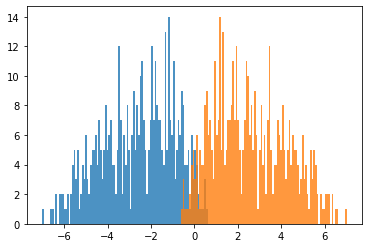

In [7]:
plt.hist(out[y_test==-1], alpha=0.8, bins=100)
plt.hist(out[y_test==1], alpha=0.8, bins=100)
plt.show()

In [8]:
w = model.coef_[0]
print(f'coef {w}')
b = model.intercept_[0]
print(f'intercept {b}')

coef [3.02955747 0.7031803  2.57957048 4.2672009 ]
intercept 7.921529294853749e-07


In [9]:
def plotDensity(X_train, y_train, c_1, c_2, samples=10000):
    axes = sns.jointplot(
        x=X_train[:samples, c_1],
        y=X_train[:samples, c_2],
        hue=y_train[:samples],
        kind="kde",
        palette=["green", "red"],
        fill=True,
        alpha=0.5,
    )
    x_points = np.linspace(-1, 1)
    y_points = -(w[c_1] / w[c_2]) * x_points - b / w[c_2]
    x_points = x_points[np.logical_and(y_points < 1, y_points > -1)]
    y_points = y_points[np.logical_and(y_points < 1, y_points > -1)]
    axes.ax_joint.plot(x_points, y_points, c="b")
    axes.ax_joint.set_xlabel(f"kryterium: {c_1}")
    axes.ax_joint.set_ylabel(f"kryterium: {c_2}")

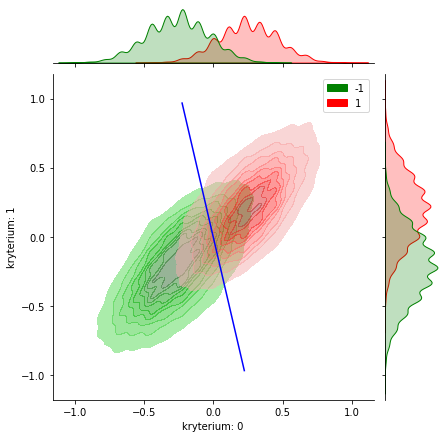

In [10]:
c_1 = 0
c_2 = 1
plotDensity(X_train, y_train, c_1, c_2, samples=10000)


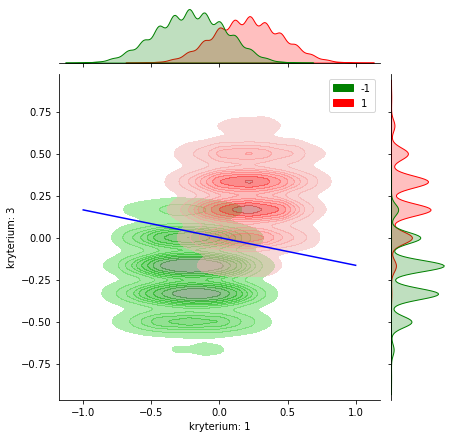

In [11]:
c_1 = 1
c_2 = 3
plotDensity(X_train, y_train, c_1, c_2, samples=10000)